# Displaying results for the signal denoising benchmark
### Using a correlation coefficient as performance metric.

This notebooks loads the results of the benchmark and generates the figures shown in the paper.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.ResultsInterpreter import ResultsInterpreter
from mcsm_benchs.SignalBank import SignalBank
from src.utilities.utilstf import get_spectrogram
import os


In [2]:
# Load the benchmark results
filename = os.path.join('..','results','last_benchmark_denoising_CC')
benchmark = Benchmark.load_benchmark(filename)

# Load interpreter.
interpreter = ResultsInterpreter(benchmark)

In [3]:
# Get report and figures for the paper/repository

# Interactive figures shown in the repo
interpreter.get_html_figures(path='../results/denoising_CC', bars=True, ylabel='CC')

# .csv files for sharing results
interpreter.get_csv_files(path='../results/denoising_CC')

# Report shown in the repo 
interpreter.save_report(filename='results_denoising_CC.md', path='../results', link='https://jmiramont.github.io/benchmarks-detection-denoising/results/denoising_CC')

# Check DataFrame of results.
df_rearr = interpreter.rearrange_data_frame()
df_rearr

,SNRin,Method,Parameter,Signal_id,Repetition,QRF
0,-5,brevdo_method,"((), {})",HermiteFunction,0,0.697859
1,-5,brevdo_method,"((), {})",HermiteFunction,1,0.664181
2,-5,brevdo_method,"((), {})",HermiteFunction,2,0.582211
3,-5,brevdo_method,"((), {})",HermiteFunction,3,0.527699
4,-5,brevdo_method,"((), {})",HermiteFunction,4,0.534738
...,...,...,...,...,...,...
21595,20,thresholding_hard,"((), {})",McSyntheticMixture3,95,0.999153
21596,20,thresholding_hard,"((), {})",McSyntheticMixture3,96,0.999063
21597,20,thresholding_hard,"((), {})",McSyntheticMixture3,97,0.998889
21598,20,thresholding_hard,"((), {})",McSyntheticMixture3,98,0.998914


In [4]:
# Check DataFrame of results.
df_rearr = interpreter.rearrange_data_frame()
df_rearr = df_rearr.loc[df_rearr['SNRin']<10,:]
df_rearr = df_rearr.loc[df_rearr['Parameter']!='([], [], [], 0.4, 0.2, [], [], [], [], [])',:]

df_rearr


,SNRin,Method,Parameter,Signal_id,Repetition,QRF
0,-5,brevdo_method,"((), {})",HermiteFunction,0,0.697859
1,-5,brevdo_method,"((), {})",HermiteFunction,1,0.664181
2,-5,brevdo_method,"((), {})",HermiteFunction,2,0.582211
3,-5,brevdo_method,"((), {})",HermiteFunction,3,0.527699
4,-5,brevdo_method,"((), {})",HermiteFunction,4,0.534738
...,...,...,...,...,...,...
10795,0,thresholding_hard,"((), {})",McSyntheticMixture3,95,0.896756
10796,0,thresholding_hard,"((), {})",McSyntheticMixture3,96,0.894642
10797,0,thresholding_hard,"((), {})",McSyntheticMixture3,97,0.908941
10798,0,thresholding_hard,"((), {})",McSyntheticMixture3,98,0.879443


## Figures for the paper

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
def inset_config(ax,fig,loc,stft):
    """Define configuration of inset axis

    Args:
        ax: Input axis.
        fig: Input figure.
        loc (int): int() indicating the quadrant where the inset is located.
        stft (nd.array): STFT matrix, the modulus of which is shown in the inset.
    """
    axins = inset_axes(ax, width=0.55, height=0.55, loc=loc) #loc=spectrogram_loc[i])
    axins.imshow(np.abs(stft), origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', 
                      which='both', 
                      bottom=False, 
                      top=False, 
                      labelbottom=False, 
                      right=False, 
                      left=False, 
                      labelleft=False)


McMultiLinear


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



McMultiLinear2


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



McSyntheticMixture


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



McSyntheticMixture2


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



McSyntheticMixture3


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



HermiteFunction


/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:502: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12331/4212463145.py:63: UserWarning:

FixedFormatter should only be used together with FixedLocator

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/SignalBank.py:1174: RuntimeWarning:

divide by zero encountered in divide



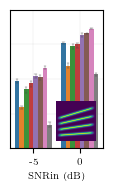

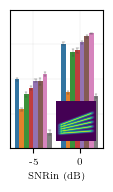

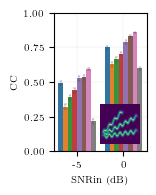

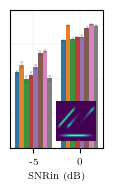

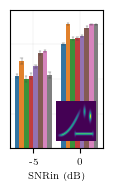

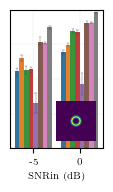

<Figure size 640x480 with 0 Axes>

In [7]:
# Set the spectrogram parameters for each signal
Nfft = 2*benchmark.N
signals = benchmark.signal_ids

# Figures size in inches
fig_size_h = 1.8
fig_size_w = 1.2

# Get Figures as bar plots.
errbar_params = {'errwidth':0.25,
                'capsize':0.05,
                }

figs = interpreter.get_summary_plots(size=(fig_size_w,fig_size_h),
                                    df_rearr=df_rearr.copy(),
                                    savetofile=False, 
                                    plot_type='bars',
                                    errbar_fun = ('ci',(1-0.05/8)*100),
                                    errbar_params = errbar_params,
                                    )

for i, fig in enumerate(figs):
    # Get signal the signal for each figure and compute spectrogram
    s = benchmark.signal_dic[signals[i]]() 
    S, stft= get_spectrogram(s)
    stft = stft[0:Nfft//2+1]
    ax = fig.axes[0]

    
    axins = inset_axes(ax, width=0.4, height=0.4, loc=4) #loc=spectrogram_loc[i])
    axins.imshow(np.abs(stft), origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', 
                      which='both', 
                      bottom=False, 
                      top=False, 
                      labelbottom=False, 
                      right=False, 
                      left=False, 
                      labelleft=False)

    ax.get_legend().remove()

    ax.set_ylabel('', fontsize=7)
    if i in [2,]:
        ax.set_ylabel(r'CC', fontsize=7)

    ax.set_title('',fontsize=6) #ax.get_title()
    ax.set_ylabel(ax.get_ylabel(),fontsize=7)
    
    ax.set_xlabel(ax.get_xlabel(),fontsize=7)
    ax.set_ylim([0.0, 1.0])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
    if i not in [2,]:
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
    
    fig.canvas.draw()
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
    plt.grid(True)
    fig.canvas.draw()
    
    # Save figure
    filename = os.path.join('figures','results_denoising_CC_'+signals[i]+'.pdf')
    fig.savefig(filename, 
                dpi=900, 
                transparent=False, 
                bbox_inches='tight',
                pad_inches=0.01,
            )

# Get a different figure with the personalized legend for the paper
new_legends = (r'SST+RD',r'Contours',r'DT',r'ES',r'PB',r'SZC',r'T-Soft',r'T-Hard')
legendFig = plt.figure()

h,l = figs[0].axes[0].get_legend_handles_labels()
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=4
            )
legendFig.canvas.draw()

# Save figure
filename = os.path.join('figures','legend_denoising_CC.pdf')
legendFig.savefig(filename, dpi=900, transparent=False, bbox_inches='tight')

plt.show()